# TRKD HTTP JSON with Python Example: Time-Series Interday


## Time-Series Intraday Introduction
TRKD Time-Series Intraday requests let you retrieve a timeseries of intraday market prices on an instrument, summarised in periods from 1 minute to 1 hour (configurable). This is typically used in an intraday graph to show how the price has changed during a day. 

For each period in the intraday timeseries, open price (the first tick in the period), close price (the last tick in the period), high price, low price and volume, Closing Yield value of the period, and Bid price and Ask price of the stock are returned. Intraday timeseries covering one day is returned.

The supported time intervals (periods) for Intraday timeseries are: 1 minute, 5 minutes, 30 minutes and 60 minutes


*Note*: 
* Intraday data is available for instruments up to 1 year previously. Timeseries Intraday request returns the latest traded price for the specified RIC even if the request is made during weekend or holidays.
* A maximum of 5000 points is retrievable in a single call to the Time Series service.
* Odd Lot Trades are not included in the OHLC and Volume Calculation and are not displayed in the Timeseries response if the parameter "Pre and Post Market Trading Sessions" is set in the request.


### TRKD JSON application implementation process
The JSON application requires the following steps to consume data from TRKD API services
1. Authentication with TRKD Authentication service to get an authen token
2. Send a request message with the required input information and authen token to the interested TRKD service

In [96]:
# #uncomment if you do not have requests installed

# #Install required packages in a current Jupyter kernal
import sys
# !{sys.executable} -m pip install requests
# !{sys.executable} -m pip install matplotlib 
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install pandas
!{sys.executable} -m pip install mpl_finance

  Stored in directory: C:\Users\u8004042\AppData\Local\pip\Cache\wheels\67\db\24\04ddd06ec9a5e4500b44c13d8e95898f5b90b512303e385de8
Successfully built mpl-finance


In [48]:
# import requires libraries for HTTP Request and JSON Operation
import requests
import json

In [49]:
# HTTP operations function
def doSendRequest(url, requestMsg, headers):
    result = None
    try:
        result = requests.post(url, data=json.dumps(requestMsg), headers=headers)
    except requests.exceptions.RequestException as e:
        print('Exception!!!')
        print(e)
    return result

### Authentication Process
For you reference, please see more detail regarding TRKD Authentication service in [TRKD Tutorial: Authentication](https://developers.refinitiv.com/thomson-reuters-knowledge-direct-trkd/thomson-reuters-knowledge-direct-api-trkd-api/learning?content=68078&type=learning_material_item) page.

In [50]:
# Input your TRKD credentials here

username = ''
password = ''
appid = ''

In [51]:
# Authentication parameters
token = None
expire = None

In [52]:
# TRKD Authenticaion request message

authenMsg = {'CreateServiceToken_Request_1': {'ApplicationID': appid, 'Username': username, 'Password': password}}

# TRKD Authentication service URL

authenURL = (
    'https://api.trkd.thomsonreuters.com/api/'
    'TokenManagement/TokenManagement.svc/REST/'
    'Anonymous/TokenManagement_1/CreateServiceToken_1'
)

# TRKD Authentication headers

authen_headers = {'content-type': 'application/json;charset=utf-8'}

In [53]:
# Send Authentication request

authenResult = doSendRequest(authenURL, authenMsg, authen_headers)

In [54]:
if authenResult and authenResult.status_code == 200:
    print('Authen success')
    # print('JSON resonse: %s' % (json.dumps(authenResult.json(),sort_keys=True, indent=2, separators=(',', ':'))))
    token = authenResult.json()['CreateServiceToken_Response_1']['Token']
    expire = authenResult.json()['CreateServiceToken_Response_1']['Expiration']
elif authenResult.status_code is not 200:
    print('Authen fail with status code %s' % authenResult.status_code)
    if authenResult.status_code == 500:
        print('Error: %s' % (json.dumps(authenResult.json(), sort_keys=True, indent=2, separators=(',', ':'))))

Authen success


### TRKD Time-Series: Interday Service detail
#### TRKD Service Token URL and Header

TRKD Time Series provides Interday data for developers via GetInterdayTimeSeries_4 operation. The endponint of GetInterdayTimeSeries_4 operaion is the following URL:
[http://api.trkd.thomsonreuters.com/api/TimeSeries/TimeSeries.svc/REST/TimeSeries_1/GetInterdayTimeSeries_4](http://api.trkd.thomsonreuters.com/api/TimeSeries/TimeSeries.svc/REST/TimeSeries_1/GetInterdayTimeSeries_4)

- Header: 
  - Content-type = application/json
  - X-Trkd-Auth-ApplicationID = Application ID
  - X-Trkd-Auth-Token = service Token
- Method: Post

#### HTTP Request Post Body
The GetInterdayTimeSeries_4 operation requires the following properties in a request message's body
- Symbol: A RIC of the instrument for the interday prices you want to retrieve
- StartTime: Start date and time criteria of the search. The format of the Start time should be:
yyyy-mm-ddThh:mm:ss
- EndTime: End date and time criteria of the search. The format of the Start time should be:
yyyy-mm-ddThh:mm:ss
- Interval: The interval between samples. The choices are "DAILY", "WEEKLY", "MONTHLY", "QUARTERLY", "ANNUAL" string value.

You can find more detail regarding optional properties (such as in "TrimResponse" or "Field") in [TRKD API Development Guide document](https://developers.refinitiv.com/thomson-reuters-knowledge-direct-trkd/thomson-reuters-knowledge-direct-api-trkd-api/docs).

The request message structure is following
```
{
    "GetInterdayTimeSeries_Request_4":{
      "Symbol": <RIC name>,
      "StartTime": <yyyy-mm-ddThh:mm:ss>,
      "EndTime": <yyyy-mm-ddThh:mm:ss>,
      "Interval": "DAILY"
   }
}
```
*Note*: Please pay attention that maximum "EndDate" interval is >=2038. If you specify a greater "EndDate" interval, you receive a blank response.

#### HTTP Response

The application receives a HTTP response message from TRKD from GetInterdayTimeSeries_4 operatio operation as the following attributes.
- HTTP Status: 200 OK
- Header: Content-type = application/json

The example of a response message for MSFT.O symbol and Daily interval is shown below
```
{
  "GetInterdayTimeSeries_Response_4":{
    "MetaFields":{
      "CCY":"USD",
      "NAME":"MICROSOFT CP",
      "QOS":"RT",
      "TZ":"NYC",
      "TZOFFSET":-300
    },
    "Row":[
      {
        "ASK":109.19,
        "BID":109.17,
        "CLOSE":109.19,
        "HIGH":109.24,
        "LOW":105.0,
        "OPEN":105.82,
        "TIMESTAMP":"2018-12-06T00:00:00+00:00",
        "VOLUME":49107431.0
      },
      {
        "ASK":104.8,
        "BID":104.78,
        "CLOSE":104.82,
        "HIGH":109.45,
        "LOW":104.3,
        "OPEN":108.38,
        "TIMESTAMP":"2018-12-07T00:00:00+00:00",
        "VOLUME":45044937.0
      }
    ]
  }
}
```


In [77]:
# Time-Series Interday parameters

ricName = 'SCB.BK'
#change your fields (support these 'OPEN','HIGH','LOW','CLOSE','CLOSEYIELD','VOLUME','BID','ASK' fields only)
fields = ['OPEN','HIGH','LOW','CLOSE'] 

startTime = '2019-02-17T00:00:00' #change your StartTime
endtime = '2019-04-18T23:59:00'  #change your EndTime

# change your interval between 'MINUTE', '5MINUTES', '30MINUTES' and 'HOUR'
interval = 'HOUR' 

In [78]:
# TRKD Time-Series Interday Service URL
intradayURL = 'http://api.trkd.thomsonreuters.com/api/TimeSeries/TimeSeries.svc/REST/TimeSeries_1/GetIntradayTimeSeries_4'

# TRKD Time-Series Interday request message headers
intraday_headers = {
    'content-type': 'application/json;charset=utf-8' ,
    'X-Trkd-Auth-ApplicationID': appid, 
    'X-Trkd-Auth-Token' : token
}

# TRKD Time-Series Interday request message 
intradayRequestMsg = {
        'GetIntradayTimeSeries_Request_4':{
            'Field': fields,
            'TrimResponse': False,
            'Symbol': ricName,
            'StartTime':startTime,
            'EndTime':endtime,  
            'Interval':interval,
            'MetaField': ['NAME','QOS','CCY','TZ','TZOFFSET','NAME_LL']
        }
    }

In [79]:
# Send Time-Series: Interday request

intradayResult = doSendRequest(intradayURL, intradayRequestMsg, intraday_headers)

In [80]:
if intradayResult and intradayResult.status_code == 200:
        print('Time Series Interday response message: ')
        print(json.dumps(intradayResult.json(), sort_keys=True, indent=2, separators=(',', ':')))

Time Series Interday response message: 
{
  "GetIntradayTimeSeries_Response_4":{
    "MetaFields":{
      "CCY":"THB",
      "NAME":"SIAM COM BANK",
      "QOS":"RT",
      "TZ":"BKK",
      "TZOFFSET":420
    },
    "Row":[
      {
        "CLOSE":133.5,
        "HIGH":134.5,
        "LOW":133.5,
        "OPEN":134.0,
        "TIMESTAMP":"2019-02-18T03:00:00+00:00"
      },
      {
        "CLOSE":133.0,
        "HIGH":134.0,
        "LOW":133.0,
        "OPEN":133.5,
        "TIMESTAMP":"2019-02-18T04:00:00+00:00"
      },
      {
        "CLOSE":132.5,
        "HIGH":133.5,
        "LOW":132.5,
        "OPEN":133.0,
        "TIMESTAMP":"2019-02-18T05:00:00+00:00"
      },
      {
        "CLOSE":133.0,
        "HIGH":133.0,
        "LOW":132.5,
        "OPEN":132.5,
        "TIMESTAMP":"2019-02-18T06:00:00+00:00"
      },
      {
        "CLOSE":133.0,
        "HIGH":133.0,
        "LOW":132.5,
        "OPEN":132.5,
        "TIMESTAMP":"2019-02-18T08:00:00+00:00"
      },
      {
  

### Creating a Pandas Data Frame
Next, we convert incoming JSON object to a [Pandas](https://pandas.pydata.org/) Data Frame object. We get a list of columns names from the JSON object and construct a data frame named *df*.

In [98]:
# import requires Pandas and matplotlib libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import seaborn; seaborn.set()

In [82]:
intraday_data = intradayResult.json()['GetIntradayTimeSeries_Response_4']['Row']

In [83]:
columns = [key for key in intraday_data[0]]

In [84]:
df = pd.DataFrame(intraday_data, columns = columns)


In [85]:
# check Data Frame object output
if not df.empty:
    print('Data Frame row numbers = %d' % len(df.index))
    print('Example 10 rows are:')
    print(df.head(10))

Data Frame row numbers = 280
Example 10 rows are:
    OPEN   HIGH    LOW  CLOSE                  TIMESTAMP
0  134.0  134.5  133.5  133.5  2019-02-18T03:00:00+00:00
1  133.5  134.0  133.0  133.0  2019-02-18T04:00:00+00:00
2  133.0  133.5  132.5  132.5  2019-02-18T05:00:00+00:00
3  132.5  133.0  132.5  133.0  2019-02-18T06:00:00+00:00
4  132.5  133.0  132.5  133.0  2019-02-18T08:00:00+00:00
5  133.0  133.0  132.0  132.5  2019-02-18T09:00:00+00:00
6  132.5  132.5  132.0  132.5  2019-02-18T10:00:00+00:00
7  132.5  132.5  132.0  132.5  2019-02-20T03:00:00+00:00
8  132.5  133.0  132.0  132.0  2019-02-20T04:00:00+00:00
9  132.5  133.0  132.0  133.0  2019-02-20T05:00:00+00:00


## Ploting Graph
We use Python [Matplotlib](https://matplotlib.org/) library to plot a graph from Pandas Data Frame object. The target graph compares 'Open', 'High', 'Low' and 'Close' data between time ('Timestamp' field). 

We firstly re-arrange and re-format the Timestamp value in the Data Frame object to use it in X-axis for the graph.

In [86]:
df['TIMESTAMP']= df['TIMESTAMP'].str.split('T00').str[0]
df.sort_values('TIMESTAMP',ascending=True,inplace=True)

Then we plotting a graph, the X-axis is 'Timestamp' values and the Y-axis is fields values.

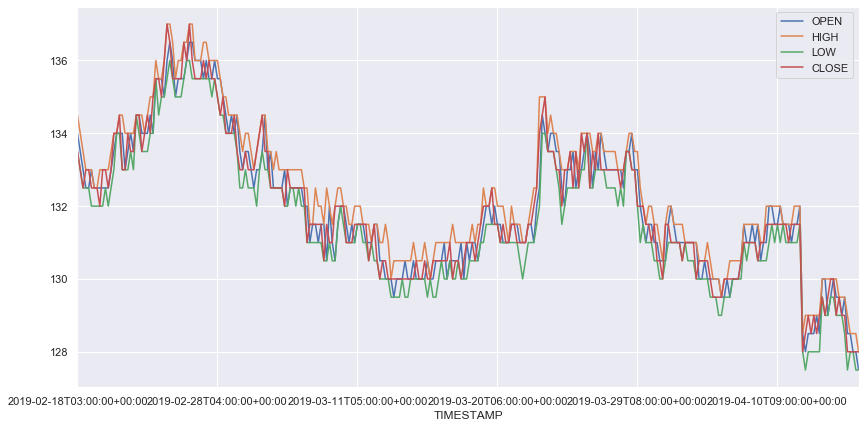

In [92]:
df.plot(x = 'TIMESTAMP',y = fields,figsize=(14,7))

In [102]:
ohlc= df[columns].copy()

In [104]:
ohlc.values

array([[134.0, 134.5, 133.5, 133.5, '2019-02-18T03:00:00+00:00'],
       [133.5, 134.0, 133.0, 133.0, '2019-02-18T04:00:00+00:00'],
       [133.0, 133.5, 132.5, 132.5, '2019-02-18T05:00:00+00:00'],
       ...,
       [128.0, 128.5, 128.0, 128.0, '2019-04-18T08:00:00+00:00'],
       [128.0, 128.5, 127.5, 128.0, '2019-04-18T09:00:00+00:00'],
       [127.5, 128.0, 127.5, 128.0, '2019-04-18T10:00:00+00:00']],
      dtype=object)

In [108]:
df['LOW']

0      133.5
1      133.0
2      132.5
3      132.5
4      132.5
5      132.0
6      132.0
7      132.0
8      132.0
9      132.0
10     132.5
11     132.0
12     132.5
13     133.0
14     134.0
15     134.0
16     133.0
17     133.0
18     133.0
19     133.5
20     133.0
21     134.5
22     134.0
23     133.5
24     133.5
25     133.5
26     134.0
27     134.0
28     135.5
29     134.5
       ...  
250    131.5
251    131.0
252    131.5
253    131.0
254    131.0
255    131.0
256    131.0
257    131.0
258    131.5
259    128.0
260    127.5
261    128.0
262    128.0
263    128.0
264    128.0
265    128.0
266    129.5
267    129.0
268    129.0
269    129.5
270    129.5
271    129.0
272    129.0
273    129.0
274    128.5
275    127.5
276    128.0
277    128.0
278    127.5
279    127.5
Name: LOW, Length: 280, dtype: float64

## References
For further details, please check out the following resources:
* [Thomson Reuters Knowledge Direct API page](https://developers.refinitiv.com/thomson-reuters-knowledge-direct-trkd) on the [Refinitiv Developer Community](https://developers.refinitiv.com/) web site.
* [Thomson Reuters Knowledge Direct API Catalog](https://www.trkd.thomsonreuters.com/SupportSite/RequestBuilder/requestbuilder.aspx) web site.
* [TRKD Tutorial: Time-Series - Interday](https://developers.refinitiv.com/thomson-reuters-knowledge-direct-trkd/thomson-reuters-knowledge-direct-api-trkd-api/learning?content=68082&type=learning_material_item) page.

For any question related to this tutorial or TRKD API, please use the Developer Community [Q&A Forum](https://community.developers.refinitiv.com/spaces/51/view.html).